# चुनौती: डेटा विज्ञान सम्बन्धी पाठको विश्लेषण

> *यस नोटबुकमा, हामी विभिन्न URL - मेशिन लर्निङको विकिपीडिया लेख प्रयोग गरेर प्रयोग गर्छौं। तपाईं देख्न सक्नुहुन्छ कि, डेटा विज्ञानको तुलनामा, यो लेखमा धेरै शब्दावलीहरू छन्, जसले विश्लेषणलाई अझ समस्याग्रस्त बनाउँछ। कीवर्ड निकालिसकेपछि डेटा सफा गर्न अर्को तरिका खोज्न आवश्यक छ, ताकि बारम्बार प्रयोग हुने तर अर्थपूर्ण नभएका शब्द संयोजनहरू हटाउन सकियोस्।*

यस उदाहरणमा, हामी परम्परागत डेटा विज्ञान प्रक्रियाका सबै चरणहरू समेट्ने एउटा साधारण अभ्यास गर्नेछौं। तपाईंले कुनै कोड लेख्न आवश्यक छैन, तपाईं केवल तलका सेलहरू क्लिक गरेर तिनीहरूलाई कार्यान्वयन गर्न सक्नुहुन्छ र परिणाम अवलोकन गर्न सक्नुहुन्छ। चुनौतीको रूपमा, तपाईंलाई यो कोड विभिन्न डेटा प्रयोग गरेर प्रयास गर्न प्रोत्साहित गरिन्छ।

## उद्देश्य

यस पाठमा, हामी डेटा विज्ञानसँग सम्बन्धित विभिन्न अवधारणाहरूको चर्चा गर्दैछौं। **पाठ खनन** गरेर थप सम्बन्धित अवधारणाहरू पत्ता लगाउने प्रयास गरौं। हामी डेटा विज्ञान सम्बन्धी पाठबाट सुरु गर्नेछौं, त्यसबाट कीवर्ड निकाल्नेछौं, र त्यसपछि परिणामलाई दृश्यात्मक बनाउने प्रयास गर्नेछौं।

पाठको रूपमा, म विकिपीडियाको डेटा विज्ञान पृष्ठ प्रयोग गर्नेछु:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## चरण १: डाटा प्राप्त गर्ने

प्रत्येक डाटा विज्ञान प्रक्रियाको पहिलो चरण भनेको डाटा प्राप्त गर्नु हो। हामीले यो गर्नका लागि `requests` लाइब्रेरी प्रयोग गर्नेछौं:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## चरण २: डाटालाई रूपान्तरण गर्नु

अर्को चरण भनेको डाटालाई प्रशोधनका लागि उपयुक्त स्वरूपमा रूपान्तरण गर्नु हो। हाम्रो अवस्थामा, हामीले पृष्ठबाट HTML स्रोत कोड डाउनलोड गरेका छौं, र यसलाई साधारण पाठमा रूपान्तरण गर्न आवश्यक छ।

यसलाई गर्नका लागि धेरै तरिकाहरू छन्। हामी Python को साधारण बिल्ट-इन [HTMLParser](https://docs.python.org/3/library/html.parser.html) वस्तु प्रयोग गर्नेछौं। हामीले `HTMLParser` वर्गलाई सबक्लास गर्नुपर्छ र HTML ट्यागहरूभित्रको सबै पाठ सङ्कलन गर्ने कोड परिभाषित गर्नुपर्छ, तर `<script>` र `<style>` ट्यागहरू बाहेक।


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## चरण ३: जानकारी प्राप्त गर्दै

सबैभन्दा महत्त्वपूर्ण चरण भनेको हाम्रो डाटालाई यस्तो रूपमा बदल्नु हो जसबाट हामी जानकारी निकाल्न सकौं। हाम्रो केसमा, हामी पाठबाट मुख्य शब्दहरू निकाल्न चाहन्छौं, र हेर्न चाहन्छौं कि कुन शब्दहरू बढी अर्थपूर्ण छन्।

हामी मुख्य शब्द निकाल्नको लागि [RAKE](https://github.com/aneesha/RAKE) नामक Python लाइब्रेरी प्रयोग गर्नेछौं। पहिलो, यदि यो लाइब्रेरी उपलब्ध छैन भने यसलाई स्थापना गरौं:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


मुख्य कार्यक्षमता `Rake` वस्तुबाट उपलब्ध छ, जसलाई हामी केही प्यारामिटरहरू प्रयोग गरेर अनुकूलन गर्न सक्छौं। हाम्रो अवस्थामा, हामी कुञ्जीशब्दको न्यूनतम लम्बाइ ५ अक्षर, दस्तावेजमा कुञ्जीशब्दको न्यूनतम आवृत्ति ३, र कुञ्जीशब्दमा अधिकतम शब्दहरूको संख्या २ मा सेट गर्नेछौं। अन्य मानहरूसँग खेल्न र परिणाम अवलोकन गर्न स्वतन्त्र महसुस गर्नुहोस्।


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

हामीले महत्त्वको डिग्रीसँग सम्बन्धित शब्दहरूको सूची प्राप्त गर्यौं। तपाईंले देख्न सक्नुहुन्छ, सबैभन्दा महत्त्वपूर्ण क्षेत्रहरू, जस्तै मेसिन लर्निङ र बिग डाटा, सूचीको शीर्ष स्थानमा छन्।

## चरण ४: नतिजा दृश्यात्मक बनाउने

मानिसहरूले डेटा दृश्यात्मक रूपमा सबैभन्दा राम्रोसँग बुझ्न सक्छन्। त्यसैले, केही अन्तर्दृष्टि निकाल्नका लागि डेटा दृश्यात्मक बनाउनु प्रायः उपयोगी हुन्छ। हामी `matplotlib` पुस्तकालयलाई प्रयोग गरेर कुञ्जीशब्दहरूको महत्त्वको साथमा साधारण वितरणको ग्राफ बनाउन सक्छौं:


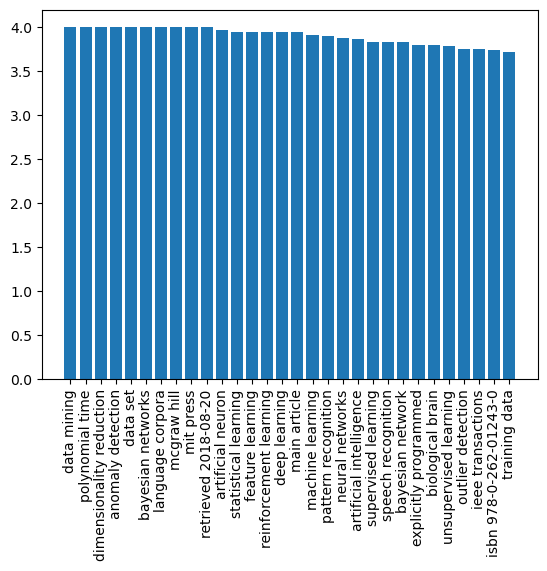

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

यद्यपि, शब्द आवृत्तिहरूलाई देखाउने अझ राम्रो तरिका छ - **शब्द बादल** प्रयोग गरेर। हाम्रो कुञ्जीशब्द सूचीबाट शब्द बादल बनाउन अर्को पुस्तकालय स्थापना गर्न आवश्यक हुनेछ।


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` वस्तु मूल पाठ वा पहिले गणना गरिएको शब्दहरूको सूची तिनीहरूको आवृत्तिहरूसँग लिन्छ, र छवि फिर्ता गर्छ, जसलाई त्यसपछि `matplotlib` प्रयोग गरेर प्रदर्शन गर्न सकिन्छ:


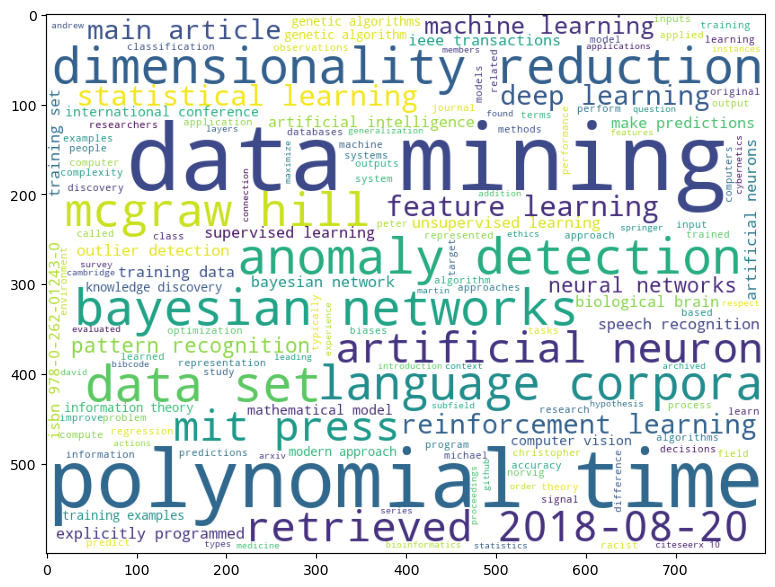

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

हामी मूल पाठलाई `WordCloud` मा पनि पास गर्न सक्छौं - हेरौं कि हामी समान परिणाम प्राप्त गर्न सक्षम छौं कि छैन:


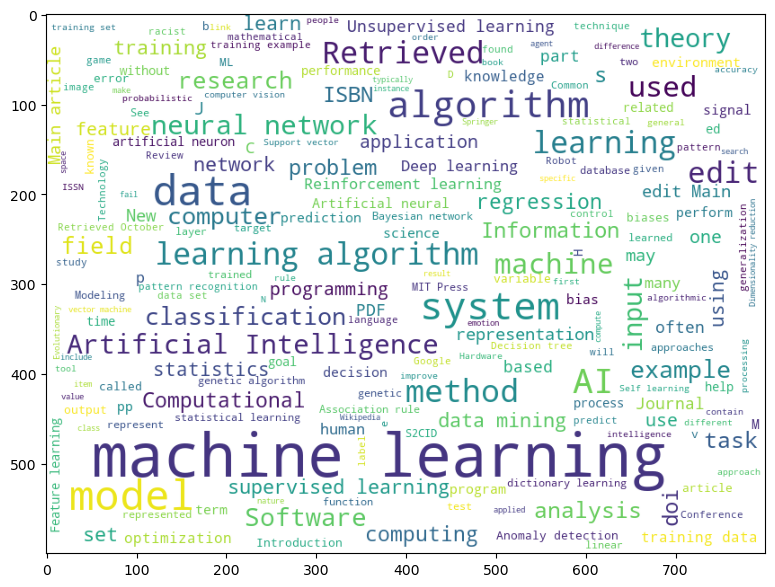

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

तपाईं देख्न सक्नुहुन्छ कि शब्द बादल अब अझ प्रभावशाली देखिन्छ, तर यसमा धेरै अनावश्यक शब्दहरू (जस्तै `Retrieved on` जस्ता असम्बन्धित शब्दहरू) पनि समावेश छन्। साथै, हामीलाई दुई शब्दहरू मिलेर बनेका कुञ्जीशब्दहरू, जस्तै *data scientist* वा *computer science*, कम प्राप्त हुन्छन्। यसको कारण RAKE एल्गोरिदमले पाठबाट राम्रो कुञ्जीशब्दहरू चयन गर्न धेरै राम्रो काम गर्छ। यो उदाहरणले डाटा पूर्व-प्रशोधन र सफाइको महत्त्वलाई देखाउँछ, किनभने अन्त्यमा स्पष्ट तस्वीरले हामीलाई राम्रो निर्णय लिन सहयोग गर्दछ।

यस अभ्यासमा हामीले विकिपेडियाको पाठबाट केही अर्थ निकाल्ने सरल प्रक्रिया पार गरेका छौं, कुञ्जीशब्द र शब्द बादलको रूपमा। यो उदाहरण धेरै सरल छ, तर यसले डाटा वैज्ञानिकले डाटासँग काम गर्दा लिने सबै सामान्य चरणहरू राम्रोसँग देखाउँछ, डाटा प्राप्तिबाट लिएर भिजुअलाइजेसनसम्म।

हाम्रो पाठ्यक्रममा हामी ती सबै चरणहरूलाई विस्तृत रूपमा छलफल गर्नेछौं।



---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरी अनुवाद गरिएको हो। हामी यथासम्भव सटीकता सुनिश्चित गर्न प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादहरूमा त्रुटि वा अशुद्धता हुन सक्छ। यसको मूल भाषामा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्त्वपूर्ण जानकारीका लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याको लागि हामी जिम्मेवार हुने छैनौं।  
